In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoTokenizer # basic, autoTokinizer, DistilBertForSequenceClassifier, 

import plotly.graph_objects as go

import streamlit as st

import torch
import fire

import concurrent.futures
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

/Users/iffiness/.pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip freeze > requirements.txt

# Sentiment Analysis of Amazon Reviews
<!-- precision and recall of 0.916 -->
## Tools  
- Python
- Pytorch (_Deep Learning model_)
- Seaborn (_statistical visualizations_)
- NLTK (_Machine Learning and Text Analysis_)

Now this looks cleaner and more manageable.  
Now looking at the count of each rating.

In [3]:
from app_scripts.load_preprocess_data import load_data, preprocess_data, get_sentiment, plot_ratings

data = load_data()
# data = preprocess_data(data)
data = get_sentiment(data)
# plot_ratings(data)


In [4]:
# data1.sample(frac=.045).to_csv('assets/data.csv', index=False)
# display(data1.sample(8))

Seems like column_0 and column_3 are numeric columns while the others are text where either column_0 is populated or column_3 is.  
So I don't think it is far-fetched to merge the columns such that:
- column_0 and column_3 are a single column
- column_1, column_2, column_4, column_5 are the text columns

In [5]:
from app_scripts.model import huggingface_autoTokenizer, huggingFace_Distilbert

data = data.sample(frac =.009).reset_index(drop=True)
# data = data.sample(20).reset_index(drop=True)

data = huggingface_autoTokenizer(data)
data = huggingFace_Distilbert(data)
data.shape, data.sample(4)


((1183, 4),
                                              sentiment  rating  \
 942    Kinda Pointless, Eric Idle makes it all wort...     3.0   
 450    It's alright This product works ok for us bu...     3.0   
 345    Dry Kill Logic This release, although not en...     3.0   
 653    less than pleased didn't really care for thi...     2.0   
 
     huggingface_autoTokenizer huggingFace_Distilbert  
 942                  Negative                2 stars  
 450                   Neutral                3 stars  
 345                  Negative                5 stars  
 653                  Negative                2 stars  )

### TODO:
- Plot the ratings.
   - For each sentence, find the main topic of the text as in what the complain is talking about. 
- Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
- Include a single value for a general rating for each single sentiment

In [6]:
display(data, data.shape)

,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert
0,This book made me laugh out loud! I enjoyed ...,4.0,Neutral,5 stars
1,Smith is here to stay... Smith does a wonder...,4.0,Negative,4 stars
2,"Beautiful, but not so useful These are really ...",2.0,Positive,3 stars
3,Another summer blockbuster- just not excelle...,4.0,Neutral,4 stars
4,Not at all helpful This book is very random ...,1.0,Positive,2 stars
...,...,...,...,...
1178,Review Under Forced Servitude to an English ...,4.0,Positive,2 stars
1179,Good if the price were $20 - $40 It is not r...,2.0,Negative,2 stars
1180,"Great product, bad workmanship & design We h...",2.0,Neutral,4 stars
1181,"A Good Guide to Habitat Restoration, with ca...",4.0,Neutral,3 stars


(1183, 4)

In [7]:
from app_scripts.topic_modelling import get_topics, get_common_topics, plot_topic_repetitions, plot_topic_vs_ratings
import pandas as pd

data = get_topics(data)
data = get_common_topics(data)
display(data)


,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert,top_words_lda,top_words_nmf,top_words_svd,common_topics
0,This book made me laugh out loud! I enjoyed ...,4.0,Neutral,5 stars,"zany, times, beginning","book, loud, presented","book, loud, accepting",book
1,Smith is here to stay... Smith does a wonder...,4.0,Negative,4 stars,"wonderful, wonder, hero","smith, bring, acid","smith, wonderful, job",smith
2,"Beautiful, but not so useful These are really ...",2.0,Positive,3 stars,"weight, useful, better","set, rate, beautiful","set, tongs, bought",set
3,Another summer blockbuster- just not excelle...,4.0,Neutral,4 stars,"wants, knight, adventure","film, just, fun","film, just, fun",film
4,Not at all helpful This book is very random ...,1.0,Positive,2 stars,"writing, paste, worst","lesson, won, plans","lesson, won, plans",lesson
...,...,...,...,...,...,...,...,...
1178,Review Under Forced Servitude to an English ...,4.0,Positive,2 stars,"sub, doesn, group","nirvana, cd, difficult","difficult, cd, nirvana",nirvana
1179,Good if the price were $20 - $40 It is not r...,2.0,Negative,2 stars,"works, just, 90","unit, 40, price","unit, good, price",unit
1180,"Great product, bad workmanship & design We h...",2.0,Neutral,4 stars,"year, workmanship, hold","product, 40, ball","product, ball, 40",product
1181,"A Good Guide to Habitat Restoration, with ca...",4.0,Neutral,3 stars,"worked, new, work_","restoration, guide, book","restoration, book, guide",restoration


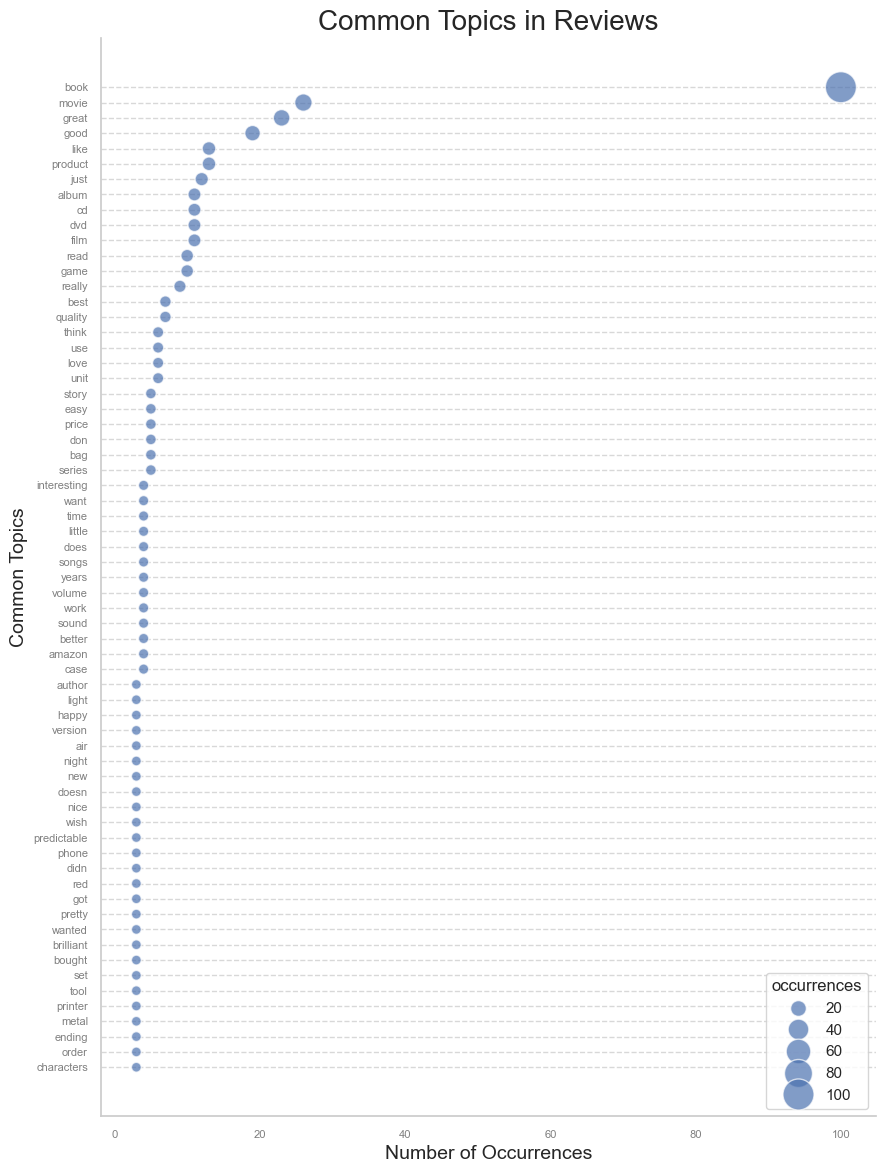

In [103]:
def plot_topic_repetition(data):
    sns.set_theme(style='whitegrid')
    thresh_value = np.unique(data.common_topics.value_counts().values)[3]
    value_counts = data['common_topics'].value_counts()
    # value_counts to dataframe with columns 'common_topics' and 'occurrences'
    value_counts = value_counts.reset_index()
    value_counts.columns = ['common_topics', 'occurrences']

    # if value_counts.occurrences.max() > 300:
    #     thresh_value = value_counts.occurrences.max() * 0.1
    # else:
    #     thresh_value = value_counts.occurrences.max() * 0.01
        
    common_topics = data[data['common_topics'].isin(value_counts[value_counts['occurrences'] > thresh_value/2]['common_topics'])]

    topic_counts = common_topics['common_topics'].value_counts().reset_index()
    topic_counts.columns = ['common_topics', 'occurrences']

    plt.figure(figsize=(10, 14))
    sns.scatterplot(data=topic_counts,
                    x='occurrences',
                    y='common_topics',
                    size='occurrences',
                    sizes=(50, 500),
                    alpha=0.7,
                    edgecolor='white',
                    linewidth=1)

    plt.title('Common Topics in Reviews', fontsize=20)
    plt.xlabel('Number of Occurrences', fontsize=14)
    plt.ylabel('Common Topics', fontsize=14)
    plt.yticks(fontsize=8, fontweight='light', color='gray')
    plt.xticks(fontsize=8, fontweight='light', color='gray')

    # plt.grid(False)
    sns.despine(left=False, bottom=False)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', alpha=0.3, color='gray', linestyle='--')

    #adjust ytick spacing
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

    plt.show()
    
plot_topic_repetition(data)


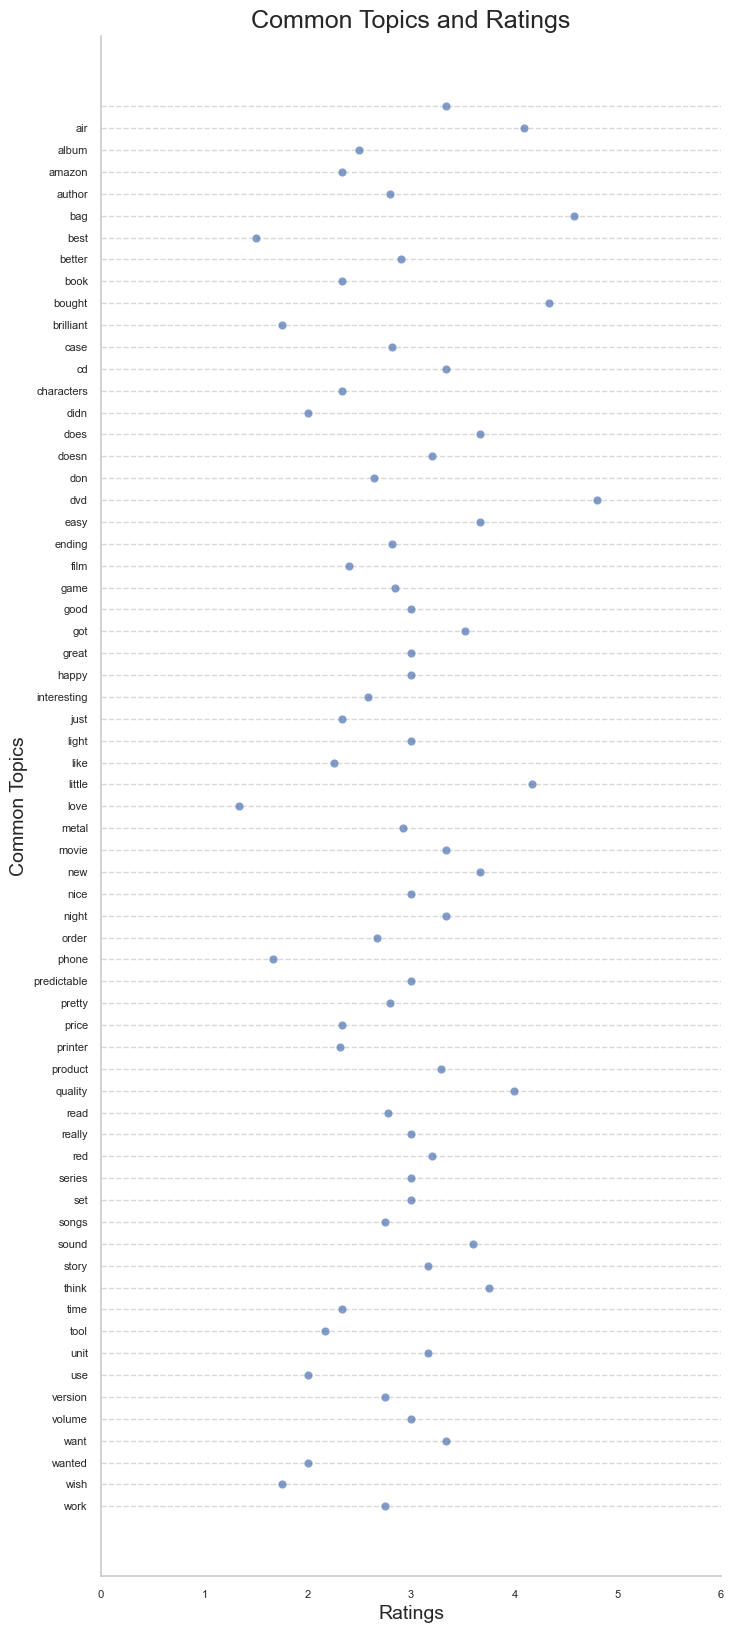

In [100]:

def plot_topic_vs_rating(data):
    thresh_value = np.unique(data.common_topics.value_counts().values)[3]
    max_ratings_by_topic = data[data.common_topics.isin(data.common_topics.value_counts()[data.common_topics.value_counts() > thresh_value/2].index)].groupby('common_topics')['rating'].mean().reset_index()

    # display(max_ratings_by_topic)

    plt.figure(figsize=(8, 20))
    sns.scatterplot(x='rating',
                    y='common_topics',
                    palette='Set1',
                    alpha=0.7,
                    linewidth=0.2,
                    edgecolor='white',
                    sizes=(100, 500),
                    legend=False,
                    data=max_ratings_by_topic)

    # plt.grid(False)
    sns.despine(left=False, bottom=False)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', alpha=0.3, color='gray', linestyle='--')

    plt.title('Common Topics and Ratings', fontsize=18)
    plt.xlabel('Ratings', fontsize=14)
    plt.ylabel('Common Topics', fontsize=14)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlim(0, 6)
    plt.gca().set_yticklabels([''] + list(max_ratings_by_topic['common_topics']))

    plt.show()
    
plot_topic_vs_rating(data)


In [10]:
print(..)

SyntaxError: invalid syntax (2448822055.py, line 1)

In [94]:
from app_scripts.topic_modelling import plot_interactive_ratings

plot_interactive_ratings(data)

data.sample(10)

,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert,top_words_lda,top_words_nmf,top_words_svd,common_topics
535,OH YEAH!! Love this box set. I watch it ALL ...,5.0,Positive,5 stars,"yeah, watch, def","love, set, fast","love, set, box",love
73,Good Phone I needed a phone without an answer ...,3.0,Negative,4 stars,"voice, damaged, handset","good, phone, amazon","phone, good, amazon",good
508,Terrible! I'll sum it up quickly. Terrible s...,1.0,Positive,1 star,"working, work, case","terrible, month, did","terrible, month, apart",terrible
797,Not what I thought it would be. As a fan of ...,1.0,Negative,2 stars,"location, freedom, major","splinter, cell, thought","thought, cell, splinter",splinter
1112,"Lots of pretty pictures not worth reading, b...",2.0,Positive,4 stars,"pictures, worth, cool","pictures, cool, worth","pictures, worth, cool",pictures
106,It just up and died! DIED! This was a weddin...,1.0,Negative,1 star,"maker, going, let","waffles, just, years","years, just, waffles",waffles
544,Relatively Poor I bought this a year ago for...,2.0,Neutral,3 stars,"new, convenient, luck","timer, year, second","year, second, batteries",timer
881,"Great Item, but noisy... This is my second t...",3.0,Positive,4 stars,"anna, easy, does","really, noisy, toaster","noisy, really, second",really
406,review This is an excellent rendition of the...,5.0,Negative,5 stars,"vibrant, version, tale","classic, enjoy, pollyanna","vibrant, version, tale",classic
1042,broke immediately my housekeeper got this in t...,2.0,Negative,1 star,"went, week, strength","broke, immediately, got","immediately, broke, 18",broke


In [97]:
# - Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
import plotly.graph_objects as go

def plot_interactive_ratings(data):
    thresh_value = np.unique(data.common_topics.value_counts().values)[3]

    max_ratings_by_topic = data[data.common_topics.isin(data.common_topics.value_counts()[data.common_topics.value_counts() > thresh_value/2].index)].groupby('common_topics')['rating'].mean().reset_index()
    
    # Create a scatter plot
    fig = go.Figure(data=go.Scatter(
        x=max_ratings_by_topic['rating'],  # Use the ratings as x-values
        y=max_ratings_by_topic['common_topics'],  # Use the common_topics as y-values
        mode='markers',  # Set the mode to markers for a scatter plot
        marker=dict(
            color=max_ratings_by_topic['rating'],  # Color the markers based on the ratings
            # colorscale='turbo',  # Choose a color scale
            # colorbar=dict(title='Ratings'),  # Add a color bar with a title
            size=10  # Set the marker size
        )
    ))
    
    # Customize the layout
    fig.update_layout(
        title='Common Topics and Average Ratings',  # Add a title
        xaxis_title='Ratings',  # Label the x-axis
        yaxis_title='Common Topics',  # Label the y-axis
        font=dict(size=10),  # Set the font size
        height=1000,  # Set the height of the plot
    )

    fig.update_yaxes(automargin=True)
    
    # Show the interactive scatter plot
    fig.show()

plot_interactive_ratings(data)